In [1]:
import numpy as np

# Example parameters
Strike = 100
Expiration = 1.0       # 1 year
Vol = 0.2              # 20% volatility
Int_Rate = 0.05        # risk-free rate
NAS = 50               # asset steps
q = 1                  # 1 for call, -1 for put

# Step sizes
dS = 2 * Strike / NAS
dt = 0.9 / (Vol**2) / (NAS**2)
NTS = int(Expiration / dt) + 1
dt = Expiration / NTS   # recompute to fit exactly

# Grid initialization
S = np.zeros(NAS + 1)
V = np.zeros((NAS + 1, NTS + 1))

# Set up S array and payoff at t=0
for i in range(NAS + 1):
    S[i] = i * dS
    V[i, 0] = max(q * (S[i] - Strike), 0)

# Time stepping
for k in range(1, NTS + 1):
    for i in range(1, NAS):
        Delta = (V[i + 1, k - 1] - V[i - 1, k - 1]) / (2 * dS)
        Gamma = (V[i + 1, k - 1] - 2 * V[i, k - 1] + V[i - 1, k - 1]) / (dS**2)
        Theta = (
            -0.5 * Vol**2 * S[i]**2 * Gamma
            - Int_Rate * S[i] * Delta
            + Int_Rate * V[i, k - 1]
        )
        V[i, k] = V[i, k - 1] - dt * Theta

    # Boundary conditions
    V[0, k] = V[0, k - 1] * (1 - Int_Rate * dt)
    V[NAS, k] = 2 * V[NAS - 1, k] - V[NAS - 2, k]

Option_Value_3D = V  # Final option value grid

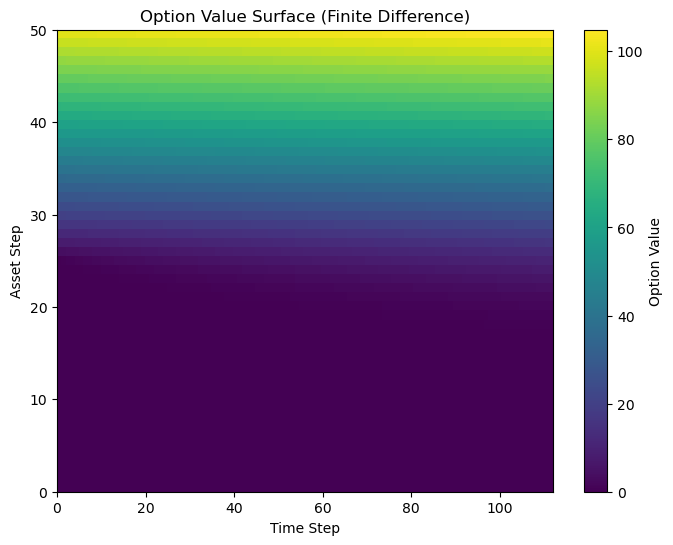

In [3]:
import matplotlib.pyplot as plt

# Convert time steps to actual time (years to maturity)
time = np.linspace(0, Expiration, NTS + 1)

plt.figure(figsize=(8, 6))
plt.imshow(
    V, 
    origin="lower",           # so time starts at bottom
    aspect="auto",
    extent=[0, NTS, 0, NAS],  # x=time step index, y=asset step index
    cmap="viridis"
)
plt.colorbar(label="Option Value")
plt.xlabel("Time Step")
plt.ylabel("Asset Step")
plt.title("Option Value Surface (Finite Difference)")
plt.show()

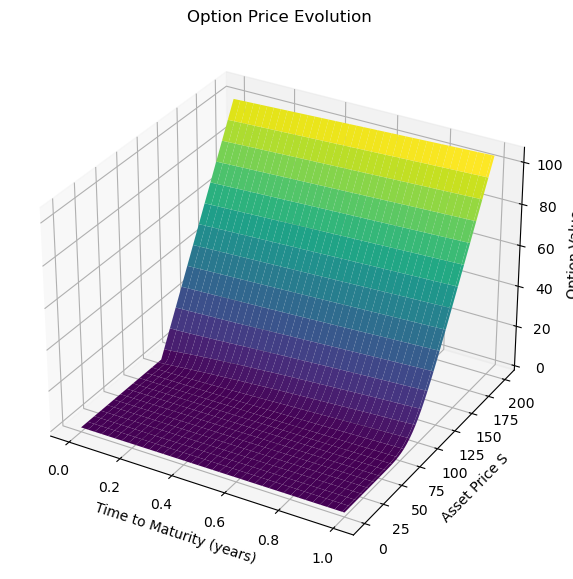

In [4]:
from mpl_toolkits.mplot3d import Axes3D

S_grid, T_grid = np.meshgrid(time, S)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(S_grid, T_grid, V, cmap="viridis")

ax.set_xlabel("Time to Maturity (years)")
ax.set_ylabel("Asset Price S")
ax.set_zlabel("Option Value")
ax.set_title("Option Price Evolution")
plt.show()

In [5]:
import pandas as pd
import numpy as np

# Create a DataFrame where:
#   Rows  = Asset Prices S
#   Columns = Time steps
df_V = pd.DataFrame(V, index=np.round(S, 2))

# Rename the columns to actual times (years)
time = np.linspace(0, Expiration, NTS + 1)
df_V.columns = [f"{t:.3f}" for t in time]

# Optional: round numbers for readability
df_V = df_V.round(4)

print(df_V.head(10))   # print first 10 asset steps

      0.000  0.009  0.018  0.027  0.036  0.045  0.054  0.062  0.071  0.080  \
0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
8.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
12.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
16.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
20.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
24.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
32.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
36.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...  0.920  0.929  0.938  0.946  0.955  0.964  0.973  0.982  0.991  \
0.0   ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0